In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years, title, xlabel, ylabel, filename):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]

    
    
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.scatter(x, y)
        plt.plot(x, y)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig(filename)
    
def find_country_to_minimize_column(df, column_name):
    return df[df[column_name] == df[column_name].min()]["Country Name"]
def find_country_to_maximize_column(df, column_name):
    return df[df[column_name] == df[column_name].max()]["Country Name"]

def find_fastest_declining_nation(df, first_year, second_year):
    lowestM = 10000000
    lowestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m < 0:
            if m < lowestM:
                lowestM = m
                lowestCountry = row["Country Name"]
            print("Declines: " + row["Country Name"] )
    return (lowestM, lowestCountry)
        
def find_fastest_growing_nation(df, first_year, second_year):
    highestM = 0
    highestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m > 0:
            if m > highestM and row["Country Name"] != "World" and row["Country Name"] != "IDA & IBRD total" and row["Country Name"] != 'Low & middle income' and row["Country Name"] != 'Middle income' and row["Country Name"] != 'Early-demographic dividend' and row["Country Name"] != 'Lower middle income' and row["Country Name"] != 'IBRD only' and row["Country Name"] !='IDA total':
                highestM = m
                highestCountry = row["Country Name"]
            print("Inclines: " + row["Country Name"] )
    return (highestM, highestCountry)


In [65]:
df = read_and_preprocess("population_data.csv", [], ["2018"])
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,...,1.014550e+05,1.016690e+05,1.020460e+05,1.025600e+05,1.031590e+05,1.037740e+05,1.043410e+05,1.048720e+05,1.053660e+05,1.058450e+05
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996973e+06,9.169410e+06,9.351441e+06,9.543205e+06,9.744781e+06,9.956320e+06,...,2.839481e+07,2.918551e+07,3.011741e+07,3.116138e+07,3.226959e+07,3.337079e+07,3.441360e+07,3.538313e+07,3.629640e+07,3.717239e+07
2,Angola,AGO,"Population, total",SP.POP.TOTL,5.454933e+06,5.531472e+06,5.608539e+06,5.679458e+06,5.735044e+06,5.770570e+06,...,2.251428e+07,2.335625e+07,2.422066e+07,2.510793e+07,2.601578e+07,2.694178e+07,2.788438e+07,2.884248e+07,2.981675e+07,3.080976e+07
3,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.446300e+04,8.444900e+04,8.374700e+04,8.242700e+04,8.077400e+04,7.921300e+04,7.801100e+04,7.729700e+04,7.700100e+04,7.700600e+04
5,Arab World,ARB,"Population, total",SP.POP.TOTL,9.219775e+07,9.472451e+07,9.733444e+07,1.000342e+08,1.028328e+08,1.057364e+08,...,3.466292e+08,3.548900e+08,3.631587e+08,3.714435e+08,3.797057e+08,3.879077e+08,3.960283e+08,4.040244e+08,4.118990e+08,4.197906e+08
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,9.241800e+04,1.007960e+05,1.121180e+05,1.251300e+05,1.380390e+05,1.498570e+05,...,7.917372e+06,8.549988e+06,8.946777e+06,9.141596e+06,9.197910e+06,9.214175e+06,9.262900e+06,9.360980e+06,9.487203e+06,9.630959e+06
7,Argentina,ARG,"Population, total",SP.POP.TOTL,2.048178e+07,2.081727e+07,2.115305e+07,2.148891e+07,2.182442e+07,2.215965e+07,...,4.048279e+07,4.078845e+07,4.126149e+07,4.173327e+07,4.220294e+07,4.266950e+07,4.313197e+07,4.359037e+07,4.404481e+07,4.449450e+07
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1.874121e+06,1.941492e+06,2.009526e+06,2.077578e+06,2.145001e+06,2.211319e+06,...,2.888092e+06,2.877319e+06,2.876538e+06,2.884229e+06,2.897584e+06,2.912403e+06,2.925553e+06,2.936146e+06,2.944809e+06,2.951776e+06
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.012300e+04,2.060200e+04,2.125300e+04,2.203400e+04,2.285400e+04,2.367200e+04,...,5.668300e+04,5.607900e+04,5.575900e+04,5.566700e+04,5.571300e+04,5.579100e+04,5.581200e+04,5.574100e+04,5.562000e+04,5.546500e+04


0


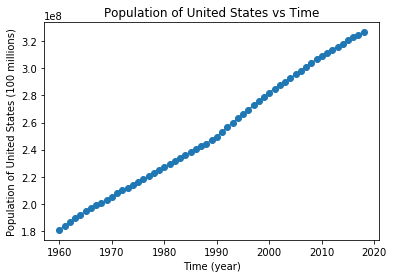

In [91]:
plot_country_data(df, "United States", False, True, 1960, 2018, [], "Population of United States vs Time", "Time (year)", "Population of United States (100 millions)", "POPus.png")


In [77]:
find_fastest_declining_nation(df, "2017", "2018")

Declines: Albania
Declines: American Samoa
Declines: Bulgaria
Declines: Bosnia and Herzegovina
Declines: Belarus
Declines: Central Europe and the Baltics
Declines: Cuba
Declines: Curacao
Declines: Georgia
Declines: Gibraltar
Declines: Greece
Declines: Greenland
Declines: Croatia
Declines: Hungary
Declines: Italy
Declines: Japan
Declines: Lithuania
Declines: Latvia
Declines: Moldova
Declines: Montenegro
Declines: Nauru
Declines: Poland
Declines: Puerto Rico
Declines: Portugal
Declines: Romania
Declines: Russian Federation
Declines: Serbia
Declines: Syrian Arab Republic
Declines: Ukraine
Declines: Venezuela, RB
Declines: Virgin Islands (U.S.)


(-520214.00000000506, 'Venezuela, RB')

In [80]:
find_fastest_declining_nation(df, "2016", "2017")

Declines: Albania
Declines: Andorra
Declines: American Samoa
Declines: Bulgaria
Declines: Bosnia and Herzegovina
Declines: Belarus
Declines: Bermuda
Declines: Central Europe and the Baltics
Declines: Gibraltar
Declines: Greece
Declines: Greenland
Declines: Croatia
Declines: Hungary
Declines: Italy
Declines: Japan
Declines: Lithuania
Declines: Latvia
Declines: Moldova
Declines: Nauru
Declines: Puerto Rico
Declines: Portugal
Declines: Romania
Declines: Serbia
Declines: Syrian Arab Republic
Declines: Ukraine
Declines: Venezuela, RB
Declines: Virgin Islands (U.S.)


(-455769.9999996235, 'Venezuela, RB')

In [89]:
find_fastest_growing_nation(df, "2017", "2018")

Inclines: Aruba
Inclines: Afghanistan
Inclines: Angola
Inclines: Andorra
Inclines: Arab World
Inclines: United Arab Emirates
Inclines: Argentina
Inclines: Armenia
Inclines: Antigua and Barbuda
Inclines: Australia
Inclines: Austria
Inclines: Azerbaijan
Inclines: Burundi
Inclines: Belgium
Inclines: Benin
Inclines: Burkina Faso
Inclines: Bangladesh
Inclines: Bahrain
Inclines: Bahamas, The
Inclines: Belize
Inclines: Bermuda
Inclines: Bolivia
Inclines: Brazil
Inclines: Barbados
Inclines: Brunei Darussalam
Inclines: Bhutan
Inclines: Botswana
Inclines: Central African Republic
Inclines: Canada
Inclines: Switzerland
Inclines: Channel Islands
Inclines: Chile
Inclines: China
Inclines: Cote d'Ivoire
Inclines: Cameroon
Inclines: Congo, Dem. Rep.
Inclines: Congo, Rep.
Inclines: Colombia
Inclines: Comoros
Inclines: Cabo Verde
Inclines: Costa Rica
Inclines: Caribbean small states
Inclines: Cayman Islands
Inclines: Cyprus
Inclines: Czech Republic
Inclines: Germany
Inclines: Djibouti
Inclines: Dominica

(28152848.000000227, 'Sub-Saharan Africa')

In [88]:
find_fastest_growing_nation(df, "2016", "2017")

Inclines: Aruba
Inclines: Afghanistan
Inclines: Angola
Inclines: Arab World
Inclines: United Arab Emirates
Inclines: Argentina
Inclines: Armenia
Inclines: Antigua and Barbuda
Inclines: Australia
Inclines: Austria
Inclines: Azerbaijan
Inclines: Burundi
Inclines: Belgium
Inclines: Benin
Inclines: Burkina Faso
Inclines: Bangladesh
Inclines: Bahrain
Inclines: Bahamas, The
Inclines: Belize
Inclines: Bolivia
Inclines: Brazil
Inclines: Barbados
Inclines: Brunei Darussalam
Inclines: Bhutan
Inclines: Botswana
Inclines: Central African Republic
Inclines: Canada
Inclines: Switzerland
Inclines: Channel Islands
Inclines: Chile
Inclines: China
Inclines: Cote d'Ivoire
Inclines: Cameroon
Inclines: Congo, Dem. Rep.
Inclines: Congo, Rep.
Inclines: Colombia
Inclines: Comoros
Inclines: Cabo Verde
Inclines: Costa Rica
Inclines: Caribbean small states
Inclines: Cuba
Inclines: Curacao
Inclines: Cayman Islands
Inclines: Cyprus
Inclines: Czech Republic
Inclines: Germany
Inclines: Djibouti
Inclines: Dominica
In

(27627130.99997751, 'Sub-Saharan Africa')

0


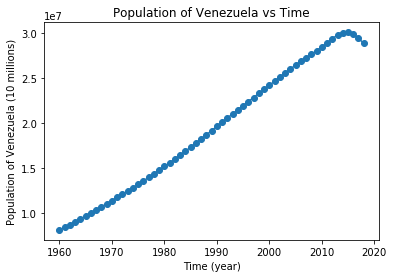

In [94]:
plot_country_data(df, "Venezuela, RB", False, True, 1960, 2018, [], "Population of Venezuela vs Time", "Time (year)", "Population of Venezuela (10 millions)", "POPven.png")


0


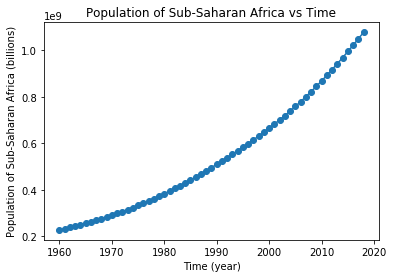

In [96]:
plot_country_data(df, "Sub-Saharan Africa", False, True, 1960, 2018, [], "Population of Sub-Saharan Africa vs Time", "Time (year)", "Population of Sub-Saharan Africa (billions)", "POPafrica.png")
